In [24]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../..')

import numpy as np
import h5py
import matplotlib.pyplot as plt

from src.datasets import Distograms 
from src.models import Discriminator64
import torch

%matplotlib inline
%config InlineBackend.figure_format='retina'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
DATASET_PATH = '../../data/training_30_64.hdf5'

In [89]:
def get_xmax(dataset_path: str) -> float:
    
    with h5py.File(dataset_path, "r") as f:
        maps = f["arr"][:]
        
    return maps.max(axis=(1, 2))

In [90]:
xmax = get_xmax(DATASET_PATH)

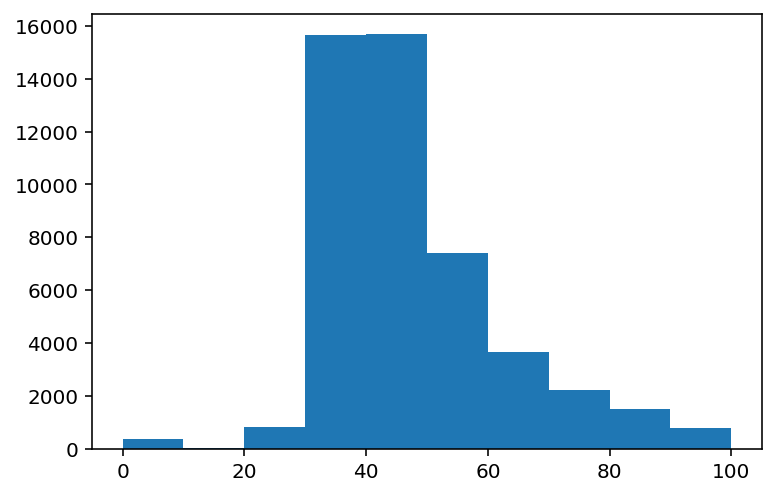

In [91]:
plt.hist(xmax);
#plt.xlim([0, 700])

In [92]:
len(xmax)

48088

In [93]:
np.max(xmax)

100.0

In [94]:
# check samples with large distances

top_idx = np.argmax(xmax)
with h5py.File(DATASET_PATH, "r") as f:
    maps = f["arr"][:]

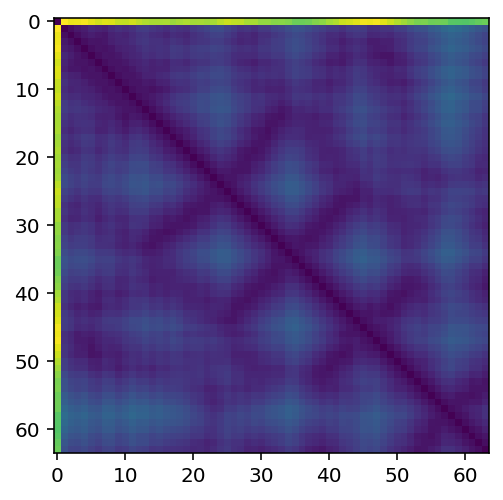

In [95]:
plt.imshow(maps[top_idx])

In [96]:
maps[top_idx]

array([[  0. , 100. ,  96.9, ...,  74.6,  76.5,  77.7],
       [100. ,   0. ,   3.8, ...,  29.4,  26.9,  24.4],
       [ 96.9,   3.8,   0. , ...,  25.7,  23.3,  20.7],
       ...,
       [ 74.6,  29.4,  25.7, ...,   0. ,   3.8,   5.5],
       [ 76.5,  26.9,  23.3, ...,   3.8,   0. ,   3.8],
       [ 77.7,  24.4,  20.7, ...,   5.5,   3.8,   0. ]])

In [76]:
np.percentile(xmax, 90)

93.4

In [77]:
len(xmax)

77035

In [78]:
len(xmax) * 0.9

69331.5

In [7]:
ds = Distograms(DATASET_PATH, 100)

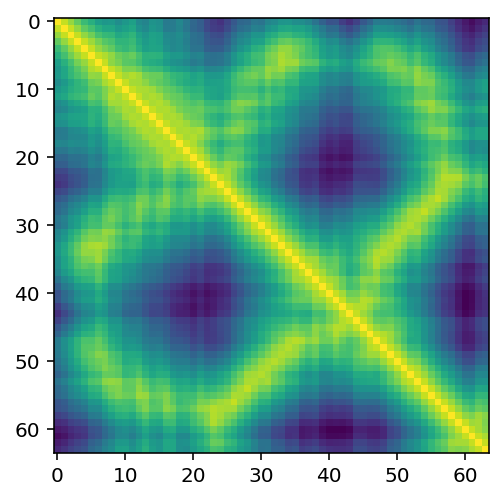

In [14]:
plt.imshow(ds[1][0], cmap='viridis_r')

In [21]:
ds[1][0].shape

torch.Size([64, 64])

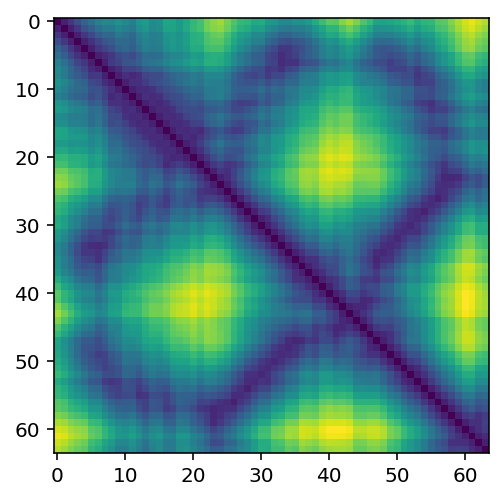

In [18]:
plt.imshow(ds[1][0] * 100)

In [25]:
torch.sigmoid(Discriminator64()(ds[1][0].unsqueeze(0).unsqueeze(0)))

tensor([[[[0.6443]]]], grad_fn=<SigmoidBackward0>)